1 November 2023

# Reprojecting and Clipping

- How to change the crs of a gpd.GeoDataFrame
- Clip different geoetries using a ploygon

## Data

- TIGER shapefiles for US States
- Natural Earth simple medium scale populated places
- Natural Eath road data set

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box # importing just a single function from a package

In [ ]:
pd.set_option("display.max.columns", None)

## Read in Data

In [4]:
states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')
states.columns = states.columns.str.lower()

places = gpd.read_file('data/ne_50m_populated_places_simple/ne_50m_populated_places_simple.shp')

roads = gpd.read_file('data/ne_10m_roads/ne_10m_roads.shp')

## Prepare Alaska Polygon

### Data Exploration

In [6]:
print(states.crs)
states.head(3)

epsg:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<AxesSubplot:>

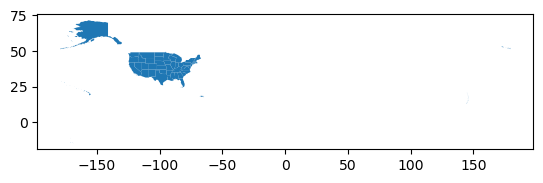

In [8]:
states.plot()

### Select the data

<AxesSubplot:>

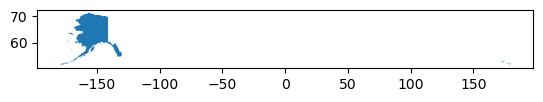

In [11]:
alaska = states[states.name == 'Alaska']
alaska.plot()

### Reprojecting

- Alaska's islands are elongating the map so we want to reproject the geodataframe
    - i.e. changing the crs of `alaska`'s geospatial data
- Want to reproject to CRS EPSG:3338
    - opimized for working with data from Alaska
- `to_crs()`
    - `updated_geodf = geodf.to_crs(new_crs)`
    - getting a new data frame from the reprojection, not overriding the original

<AxesSubplot:>

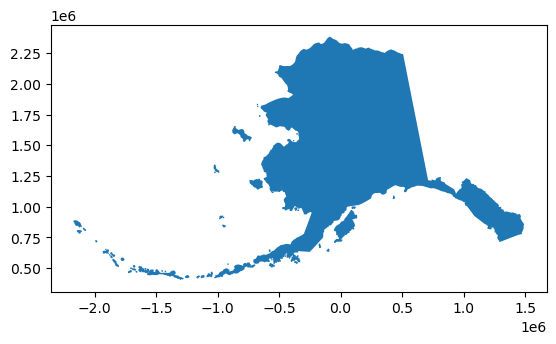

In [12]:
alaska = alaska.to_crs('epsg:3338')
alaska.plot()

In [14]:
print(alaska.crs.is_projected)
alaska.crs

True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Prepare populated places

### Exploration

In [17]:
print(places.crs)
places.head(3)

epsg:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)


<AxesSubplot:>

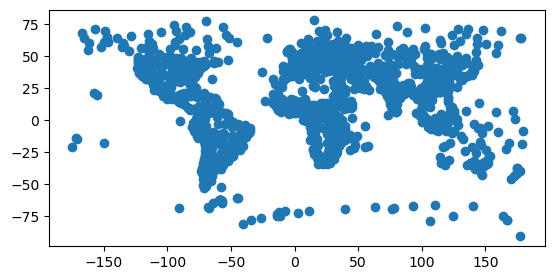

In [18]:
places.plot()

`places` has CRS EPSG:4326 aka WGS84
- most used CRS for global data

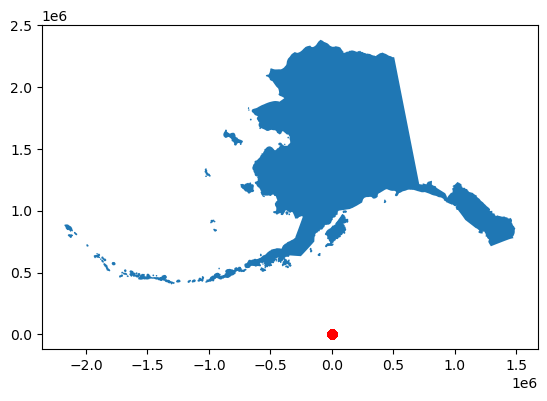

In [20]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color = 'red')

plt.show()

**Cannot mamke two pieces of geospatial data interact unless that have the same CRS**

In [21]:
print(alaska.crs)
print(places.crs)

epsg:3338
epsg:4326


### Reproject `places`
- use to_crs()

In [23]:
places = places.to_crs(alaska.crs)
print(places.crs == alaska.crs)

True


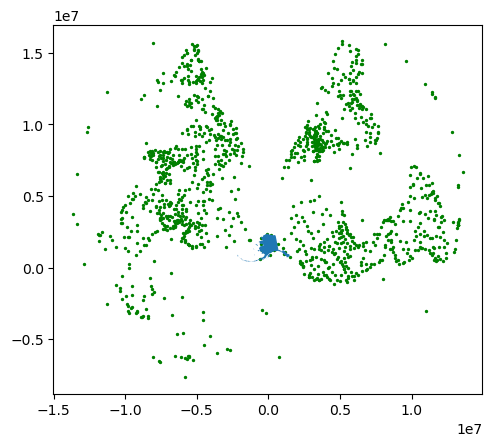

In [27]:
fig, ax = plt.subplots()

places.plot(ax=ax, color = 'green', markersize = 2)
alaska.plot(ax=ax)

plt.show()

### Clipping

**Clipping**: using a polygon or polygons to only select geospatial data within those polygons  
- intersection of two geodataframes

In [28]:
ak_places = gpd.clip(places, alaska) # dataframe we want to clip, geodataframe with ploygons we will use for clipping
ak_places

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
764,3,110,1,Populated place,Cold Bay,None,None,Cold Bay,0,0,...,200,108,0.0,1,1,None,Cold Bay,5.0,1159150541,POINT (-553201.466 612732.247)
763,3,110,1,Populated place,Kodiak,None,None,Kodiak,0,0,...,9461,6148,9122.0,5,5,None,Kodiak,5.0,1159150539,POINT (94470.762 866399.197)
215,4,50,1,Populated place,Sitka,None,None,Sitka,0,0,...,8931,7289,0.0,5,5,None,Sitka,5.1,1159149319,POINT (1115512.589 941665.222)
770,3,110,1,Admin-1 capital,Juneau,None,None,Juneau,0,0,...,30711,21633,0.0,7,7,None,Juneau,4.0,1159150555,POINT (1128929.841 1090424.979)
765,3,110,1,Populated place,Bethel,None,None,Bethel,0,0,...,6228,4653,0.0,5,4,None,Bethel,5.0,1159150543,POINT (-419821.224 1225558.907)
1080,2,200,1,Populated place,Anchorage,None,None,Anchorage,0,0,...,260283,243853,0.0,10,10,None,Anchorage,3.0,1159151249,POINT (220064.767 1254886.849)
769,3,110,1,Populated place,Valdez,None,None,Valdez,0,0,...,4036,2530,0.0,4,4,None,Valdez,5.0,1159150553,POINT (409805.897 1262980.440)
768,3,110,1,Populated place,Nome,None,None,Nome,0,0,...,3485,2557,2450.0,4,4,None,Nome,4.0,1159150551,POINT (-544875.137 1662874.547)
771,3,110,1,Populated place,Fairbanks,None,None,Fairbanks,0,0,...,56993,30224,0.0,8,7,None,Fairbanks,4.0,1159150557,POINT (297978.605 1666997.434)
766,3,110,1,Populated place,Point Hope,None,None,Point Hope,0,0,...,461,461,0.0,2,2,None,Point Hope,5.0,1159150547,POINT (-529220.980 2094066.281)


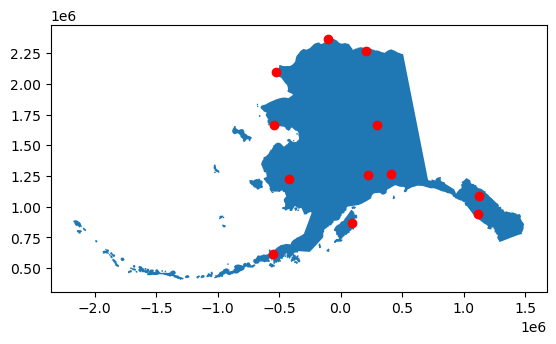

In [32]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_places.plot(ax=ax, color = 'red')

plt.show()

## Prepare Roads

### Exploration

In [33]:
print(roads.crs)
roads.head(3)

epsg:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,...,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,...,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,...,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


<AxesSubplot:>

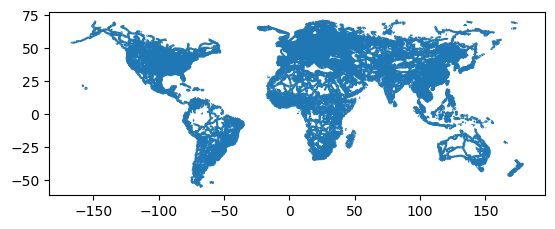

In [34]:
roads.plot()

### Data Selection

- geospatial operations use a lot of computer resources so it can be good to reduce the data before doing spatial modifications

<AxesSubplot:>

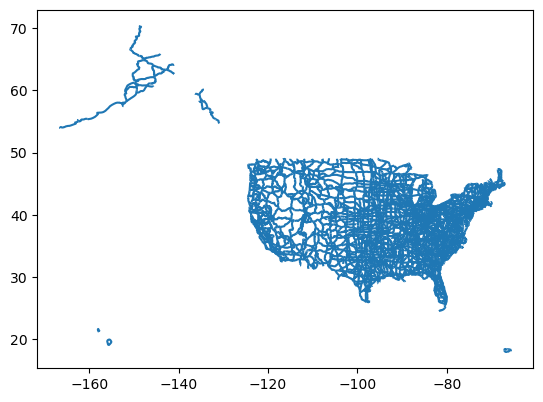

In [35]:
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

### Clipping with a bounding box

- Clip `usa_roads` with the bounding box of `alaska` instead of its polygons
- `box()` from `shapely.geometry`
    - `box(minx, miny, maxx, maxy)`
- bounding box
    - `box(*gdf.total_bounds)`

In [36]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520816])

<class 'shapely.geometry.polygon.Polygon'>


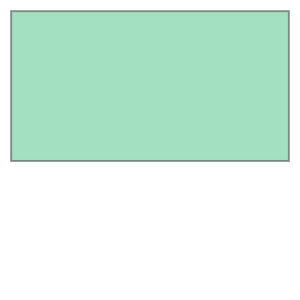

In [41]:
bbox = box(*alaska.total_bounds) 
# * is an unpacking operator, unpacks the content of alaska.total_bounds and assigns them to box
print(type(bbox))
bbox

In [42]:
ak_bbox = gpd.GeoDataFrame(geometry = [bbox],\
                          crs = alaska.crs)

ak_bbox

,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


<AxesSubplot:>

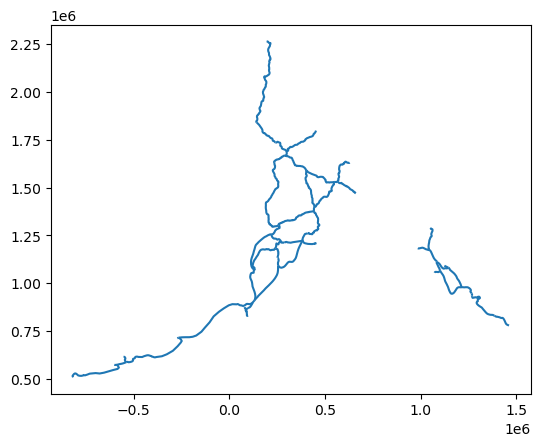

In [46]:
# one liner to reproject and clip
ak_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)
ak_roads.plot()

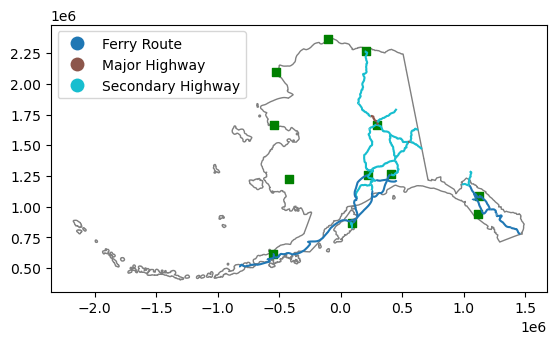

In [57]:
fig, ax = plt.subplots()

alaska.plot(ax=ax, color = 'none', edgecolor = 'grey')
ak_places.plot(ax=ax, color = 'green', marker = 's')
ak_roads.plot(ax=ax, column = 'type', legend = True)

plt.show()